<a href="https://colab.research.google.com/github/GaiaFL/Projet-Cassiopee/blob/main/Code_Yudi/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Livrarias

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

# We import a function I prepared for you in the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat

--2023-06-20 13:38:38--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.5’

visualization.py.5  100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-06-20 13:38:38 (80.8 MB/s) - ‘visualization.py.5’ saved [13023/13023]



#Preprocessing

In [2]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/main/Code_Yudi/df_yudi.csv
df_training_mod = pd.read_csv('df_yudi.csv')

--2023-06-20 13:31:37--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/main/Code_Yudi/df_yudi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3334811 (3.2M) [text/plain]
Saving to: ‘df_yudi.csv’

df_yudi.csv         100%[===================>]   3.18M  --.-KB/s    in 0.06s   

2023-06-20 13:31:37 (52.9 MB/s) - ‘df_yudi.csv’ saved [3334811/3334811]



In [3]:
varianciat = df_training_mod.var
varianciat()

Rodage_U                         9.299679e-06
V1_torque                        2.144256e-01
Rodage_I                         1.245047e+01
V2_torque                        2.125768e-01
SnapRingMidPointForce            4.675433e+01
Premier angle                    2.453186e+02
SnapRingPeakForce                1.270465e+02
Deuxième angle                   2.277531e+02
Vissage_M8_torque                4.266577e-03
Capuchon_insertion               2.484328e-01
StartLinePeakForce               6.483854e+00
Vissage_M8_angle_log             1.061920e-01
SnapRingFinalStroke_exp          2.863603e+09
Binar OP130_Resultat_Global_v    8.758903e-03
dtype: float64

In [5]:
cols_rm = ['SnapRingFinalStroke_exp'] + ['Rodage_U'] + ['StartLinePeakForce'] + ['V1_torque'] + ['Capuchon_insertion'] + ['V2_torque']
cols_rm

['SnapRingFinalStroke_exp',
 'Rodage_U',
 'StartLinePeakForce',
 'V1_torque',
 'Capuchon_insertion',
 'V2_torque']

In [6]:
df_training_filtr = df_training_mod.drop(columns = cols_rm)

In [7]:
df_training_mod['Binar OP130_Resultat_Global_v'].value_counts()

0    34210
1      305
Name: Binar OP130_Resultat_Global_v, dtype: int64

# Modelo Regressão Logística

In [8]:
df_train,df_test = train_test_split(df_training_filtr, test_size=0.2, random_state=41)

X_train = df_train.drop(columns = ['Binar OP130_Resultat_Global_v'])
X_test = df_test.drop(columns = ['Binar OP130_Resultat_Global_v'])
y_train = df_train['Binar OP130_Resultat_Global_v']
y_test = df_test['Binar OP130_Resultat_Global_v']


In [9]:
model = LogisticRegression(C=100)
model.fit(X_train, y_train)

LogisticRegression(C=100)

In [10]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.99407803, 0.00592197],
       [0.98903959, 0.01096041],
       [0.99362686, 0.00637314],
       ...,
       [0.99362912, 0.00637088],
       [0.98782187, 0.01217813],
       [0.99109926, 0.00890074]])

In [11]:
y_pred = model.predict(X_test)


In [12]:
accuracy_score(y_test, y_pred)


0.9910183977980588

Como está muito desequilibrado, a accuracy é muito elevada

In [14]:
pd.value_counts(y_train)

0    27369
1      243
Name: Binar OP130_Resultat_Global_v, dtype: int64

In [13]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
pd.value_counts(y_train_balanced)

0    27369
1    27369
Name: Binar OP130_Resultat_Global_v, dtype: int64

In [15]:
scaler = StandardScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)

In [17]:
model = LogisticRegression(C=100)
model.fit(X_train_scaled, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

Normalized confusion matrix
[[0.56673001 0.43326999]
 [0.58064516 0.41935484]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

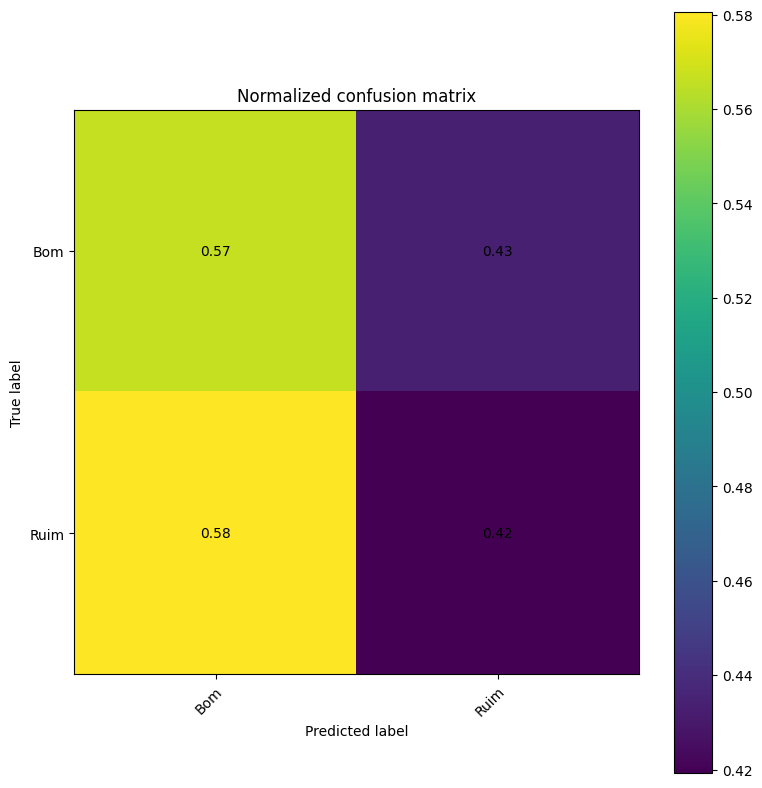

In [18]:
class_names=np.array(["Bom", "Ruim"] )
plot_conf_mat(y_test, y_pred,class_names)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


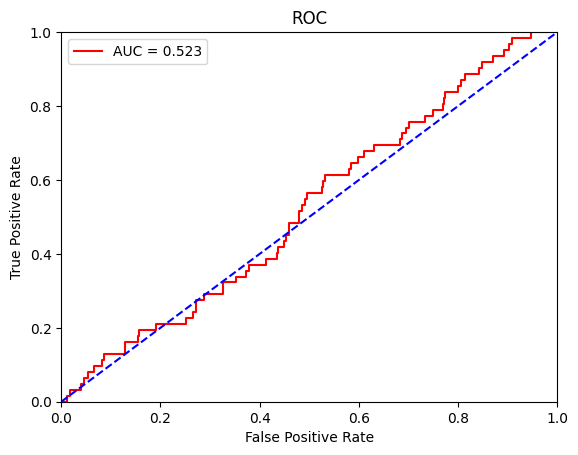

In [20]:
probability = model.predict_proba(X_test)
predicatbility = probability[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicatbility)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'red', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
parameter_grid_logistic_regression = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      # Number of iterations
    'solver': ['adam','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   # Algorithm to use for optimization
    'class_weight': ['balanced']                                    # Troubleshoot unbalanced data sampling
}

In [22]:
logistic_Model_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=parameter_grid_logistic_regression, verbose=1,
                    cv=10, n_jobs=-1)

logistic_Model_grid.fit(X_train_scaled, y_train_balanced)

print("Best score for the model after tuning is: ",logistic_Model_grid.best_score_)
print("Best parameters for the model is :",logistic_Model_grid.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best score for the model after tuning is:  0.5664071659852622
Best parameters for the model is : LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [24]:
model = LogisticRegression(random_state = 1234, solver = 'saga' , class_weight = 'balanced', max_iter = 20)
model.fit(X_train_scaled, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

Normalized confusion matrix
[[0.56673001 0.43326999]
 [0.58064516 0.41935484]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

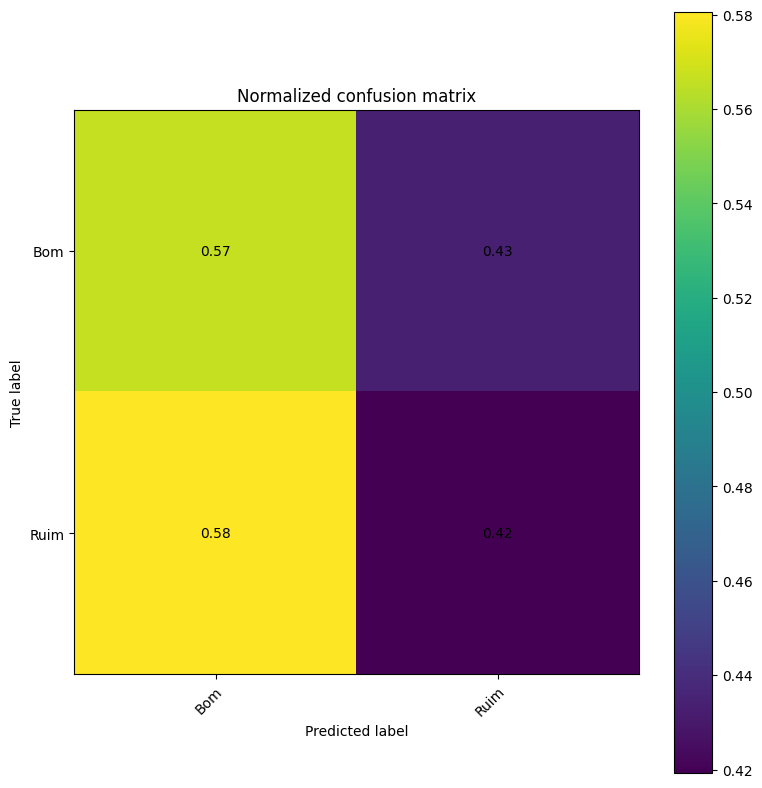

In [25]:
y_pred = model.predict(X_test_scaled)
class_names=np.array(["Bom", "Ruim"] )
plot_conf_mat(y_test, y_pred,class_names)

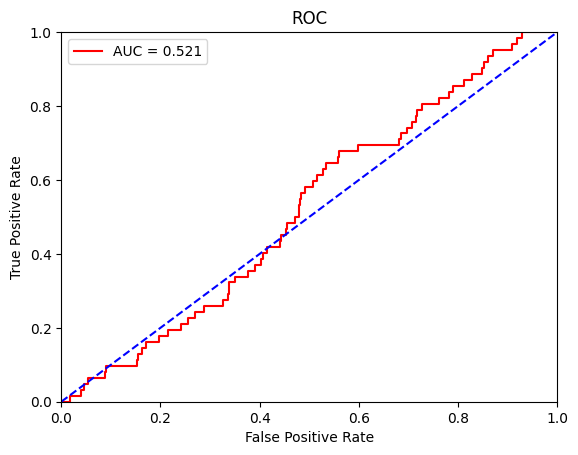

In [26]:
probability = model.predict_proba(X_test_scaled)
predicatbility = probability[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicatbility)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'red', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
accuracy_score(y_pred, y_test)

0.9910183977980588